In [5]:
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

In [6]:
df = pd.read_csv('D:/Downloads/df2016.csv')

In [7]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['FlightArrDate'] = pd.to_datetime(df['FlightArrDate'])
df['Origin'] = str(df['Origin'])
df['Dest'] = str(df['Dest'])

In [8]:
df.shape

(936841, 46)

In [9]:
#Using only dataframe rows where there is an arrival delay
df = df[df['ArrDel15'] == 1]

In [10]:
df.shape

(192487, 46)

In [11]:
import numpy as np
df['index'] = np.arange(len(df)) 

In [12]:
#Building regressor model for predicting arrival delay beforehand
df_using = df[['pressure_x','pressure_y','DewPointF_y','DewPointF_x','WindChillF_x','WindChillF_y','RoundedCRSDepTime','WindGustKmph_y','precipMM_x','precipMM_y','humidity_y','tempF_y','windspeedKmph_y','windspeedKmph_x','weatherCode_x','WindGustKmph_x','humidity_x','tempF_x','weatherCode_y','RoundedCRSArrTime']]

In [13]:
df_using.shape

(192487, 20)

In [14]:
df_using.columns

Index(['pressure_x', 'pressure_y', 'DewPointF_y', 'DewPointF_x',
       'WindChillF_x', 'WindChillF_y', 'RoundedCRSDepTime', 'WindGustKmph_y',
       'precipMM_x', 'precipMM_y', 'humidity_y', 'tempF_y', 'windspeedKmph_y',
       'windspeedKmph_x', 'weatherCode_x', 'WindGustKmph_x', 'humidity_x',
       'tempF_x', 'weatherCode_y', 'RoundedCRSArrTime'],
      dtype='object')

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df_using,df.ArrDelayMinutes,random_state = 42,test_size = 0.2)

In [26]:
# XGB Regressor
regressor_model =  XGBRegressor()
regressor_model.fit(X_train,y_train)
y_pred = regressor_model.predict(X_test)

D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:49:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [27]:
regressor_model.score(X_test,y_test)

0.028966546222635947

In [18]:
mean_absolute_error(y_test,y_pred)

42.13784705824007

In [19]:
sqrt(mean_squared_error(y_test, y_pred))

71.97279981500817

In [20]:
#Extra Trees Regressor
regressor_model = ExtraTreesRegressor()
regressor_model.fit(X_train,y_train)
y_pred = regressor_model.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
mean_absolute_error(y_test,y_pred)

45.62552708365802

In [22]:
sqrt(mean_squared_error(y_test, y_pred))

76.91139802237743

In [20]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [72]:
regressor_model = LinearRegression()
regressor_model.fit(X_train,y_train)
y_pred = regressor_model.predict(X_test)

In [59]:
mean_absolute_error(y_test,y_pred)

42.583918514071634

In [60]:
sqrt(mean_squared_error(y_test, y_pred))

72.47760098484636

In [24]:
# Earlier we have predicted the arrival delays beforehand. 
# Now we shall feed the departure delay into the model in order to estimate the arrival delay 
# after the flight has taken off

In [14]:
df_using = df[['pressure_x','DepDelayMinutes','pressure_y','DewPointF_y','DewPointF_x','WindChillF_x','WindChillF_y','RoundedCRSDepTime','WindGustKmph_y','precipMM_x','precipMM_y','humidity_y','tempF_y','windspeedKmph_y','windspeedKmph_x','weatherCode_x','WindGustKmph_x','humidity_x','tempF_x','weatherCode_y','RoundedCRSArrTime']]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df_using,df.ArrDelayMinutes,random_state = 42,test_size = 0.2)

In [16]:
# XGB Regressor
regressor_model =  XGBRegressor()
regressor_model.fit(X_train,y_train)
y_pred = regressor_model.predict(X_test)

D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:29:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [17]:
regressor_model.score(X_test,y_test)

0.9479347228803195

In [18]:
mean_absolute_error(y_test,y_pred)

11.393937161188138

In [19]:
sqrt(mean_squared_error(y_test, y_pred))

16.665770365712643

In [78]:
#Linear Regressor
regressor_model = LinearRegression()
regressor_model.fit(X_train,y_train)
y_pred = regressor_model.predict(X_test)

In [79]:
regressor_model.score(X_test,y_test)

0.9273623207177649

In [80]:
mean_absolute_error(y_test,y_pred)

14.282202647092149

In [81]:
sqrt(mean_squared_error(y_test, y_pred))

19.684857783853985

In [39]:
#Extra Trees Regressor
regressor_model = ExtraTreesRegressor()
regressor_model.fit(X_train,y_train)
y_pred = regressor_model.predict(X_test)


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
regressor_model.score(X_test,y_test)

0.9430701355353369

In [35]:
mean_absolute_error(y_test,y_pred)

12.207823783053664

In [36]:
sqrt(mean_squared_error(y_test, y_pred))

17.44016949816509

In [53]:
#Random forest regressor
regressor_model = RandomForestRegressor()
regressor_model.fit(X_train,y_train)
y_pred = regressor_model.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
regressor_model.score(X_test,y_test)

0.9433212424181393

In [55]:
mean_absolute_error(y_test,y_pred)

12.191132415041968

In [56]:
sqrt(mean_squared_error(y_test, y_pred))

17.3884736767423

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
import seaborn as sns

In [28]:
plottingdf = pd.DataFrame()


In [29]:
Arrtest = np.asarray(y_test, dtype=np.float32)

In [30]:
plottingdf['Actual'] = Arrtest
plottingdf['Predicted'] = y_pred
plottingdf['Index'] = np.arange(len(y_pred))

In [31]:
Arrtest

array([19., 86., 18., ..., 68., 32., 45.], dtype=float32)

In [32]:
len(y_test) == len(y_pred)

True

In [33]:
plottingdf

,Actual,Predicted,Index
0,19.0,54.765476,0
1,86.0,56.369431,1
2,18.0,53.378799,2
3,19.0,63.005962,3
4,119.0,63.086143,4
5,34.0,56.759068,5
6,120.0,78.009872,6
7,35.0,50.957325,7
8,171.0,61.692005,8
9,22.0,48.311680,9


In [34]:
pdf = plottingdf.sort_values(by = 'Actual', ascending = False)

In [35]:
extremedf = pdf.head(50)
extremedf['Index'] = np.arange(50)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
extremedf

,Actual,Predicted,Index
2879,1567.0,57.720356,0
150,1438.0,52.560680,1
7889,1396.0,61.273388,2
16540,1394.0,49.299744,3
26783,1366.0,54.323956,4
17045,1355.0,83.717827,5
11930,1314.0,61.837593,6
948,1287.0,55.261097,7
21293,1184.0,73.036201,8
27792,1126.0,66.977867,9


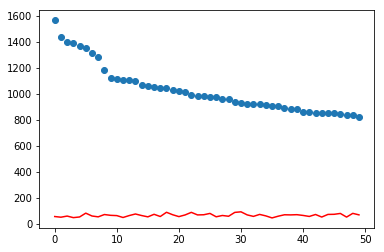

In [41]:
plt.scatter(extremedf['Index'], extremedf['Actual'])
plt.plot(extremedf['Index'], extremedf['Predicted'], color='red')
plt.show()

In [42]:
mean_absolute_error(extremedf['Actual'],extremedf['Predicted'])

963.428

In [43]:
sqrt(mean_squared_error(extremedf['Actual'],extremedf['Predicted']))

981.2012089780567

In [44]:
lowextremedf = pdf.tail(50)
lowextremedf['Index'] = np.arange(50)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


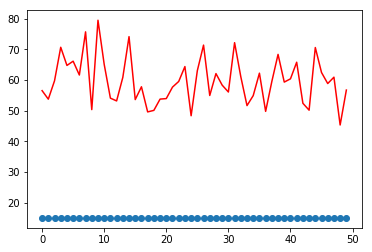

In [45]:
plt.scatter(lowextremedf['Index'], lowextremedf['Actual'])
plt.plot(lowextremedf['Index'], lowextremedf['Predicted'], color='red')
plt.show()

In [46]:
mean_absolute_error(lowextremedf['Actual'], lowextremedf['Predicted'])

44.6901

In [47]:
sqrt(mean_squared_error(lowextremedf['Actual'], lowextremedf['Predicted']))

45.33265715450066

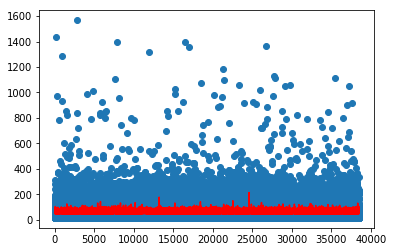

In [48]:
plt.scatter(plottingdf['Index'], plottingdf['Actual'])
plt.plot(plottingdf['Index'], plottingdf['Predicted'], color='red')
plt.show()

In [49]:
df.keys()

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime',
       'DepDel15', 'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID',
       'Origin', 'DestAirportID', 'Dest', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'FlightArrDate', 'RoundedDepTime', 'RoundedArrTime',
       'RoundedCRSDepTime', 'RoundedCRSArrTime', 'windspeedKmph_x',
       'weatherCode_x', 'precipMM_x', 'WindGustKmph_x', 'pressure_x',
       'cloudcover_x', 'winddirDegree_x', 'humidity_x', 'cloudcover.1_x',
       'DewPointF_x', 'tempF_x', 'WindChillF_x', 'windspeedKmph_y',
       'weatherCode_y', 'precipMM_y', 'WindGustKmph_y', 'pressure_y',
       'cloudcover_y', 'winddirDegree_y', 'humidity_y', 'cloudcover.1_y',
       'DewPointF_y', 'tempF_y', 'WindChillF_y', 'index'],
      dtype='object')

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


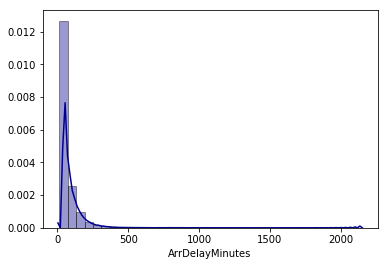

In [50]:
sns.distplot(df['ArrDelayMinutes'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             )

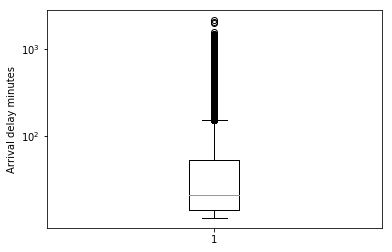

In [51]:
plt.boxplot(df.ArrDelayMinutes)
plt.yscale('symlog', linthreshy = 100.)
plt.ylabel('Arrival delay minutes')
plt.show()

In [52]:
count = 0;
for i in plottingdf.Actual.sort_values():
    count += 1;
    if(count == (38498 / 2)):
        print(i)

39.0


In [53]:
plottingdf.describe()

,Actual,Predicted,Index
count,38498.000000,38498.000000,38498.000000
mean,62.675282,62.715538,19248.500000
std,73.037788,10.614949,11113.559668
min,15.000000,44.208336,0.000000
25%,23.000000,54.952909,9624.250000
50%,39.000000,60.330866,19248.500000
75%,74.000000,68.304382,28872.750000
max,1567.000000,213.912857,38497.000000


In [54]:
#Interquartile range
from scipy.stats import iqr
iqr(plottingdf, axis = 0)

array([5.10000000e+01, 1.33514729e+01, 1.92485000e+04])

In [55]:
# Since the density values of Arrival Delay minutes is high within the range (0,500)
# We shall test to see how our model works in the aforementioned range


In [56]:
count = 0;
for i in plottingdf.Actual.sort_values():
    count += 1;
    if i >= 500:
        print(count)
        break;

38361


In [57]:
duplicate_df = pdf.tail(38361)


In [58]:
duplicate_df

,Actual,Predicted,Index
28288,501.0,58.201508,28288
1575,490.0,60.369625,1575
30517,489.0,58.325829,30517
6165,488.0,63.294231,6165
20412,486.0,74.447884,20412
7830,482.0,66.202072,7830
1777,482.0,55.755486,1777
30403,481.0,68.962379,30403
23560,480.0,74.642380,23560
37726,479.0,60.582661,37726


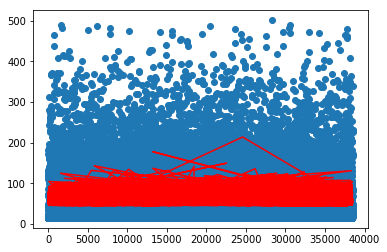

In [59]:
plt.scatter(duplicate_df['Index'], duplicate_df['Actual'])
plt.plot(duplicate_df['Index'], duplicate_df['Predicted'], color='red')
plt.show()


In [60]:
mean_absolute_error(duplicate_df['Actual'], duplicate_df['Predicted'])

39.754585

In [61]:
sqrt(mean_squared_error(duplicate_df['Actual'], duplicate_df['Predicted']))

56.577941607684

In [62]:
#Obtaining values belonging to interquartile range

In [63]:
iqr_df = plottingdf[['Actual','Predicted','Index']][plottingdf['Actual'].between(plottingdf['Actual'].quantile(.25), plottingdf['Actual'].quantile(.75), inclusive=True)]

In [64]:
iqr_df

,Actual,Predicted,Index
5,34.0,56.759068,5
7,35.0,50.957325,7
10,24.0,59.661102,10
12,43.0,77.296509,12
14,41.0,67.644257,14
15,23.0,54.375252,15
18,72.0,60.836830,18
19,69.0,72.481079,19
20,48.0,58.646843,20
22,47.0,63.580257,22


In [65]:
mean_absolute_error(iqr_df['Actual'], iqr_df['Predicted'])

22.869331

In [66]:
sqrt(mean_squared_error(iqr_df['Actual'], iqr_df['Predicted']))

26.707108666426482

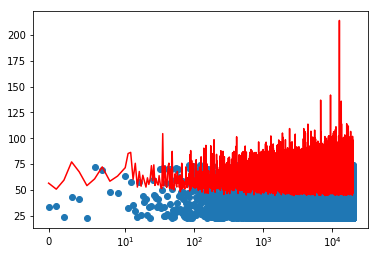

In [67]:
iqr_df['Index'] = np.arange(len(iqr_df))
plt.scatter(iqr_df['Index'], iqr_df['Actual'])
plt.plot(iqr_df['Index'], iqr_df['Predicted'], color='red')
plt.xscale('symlog', linthreshx = 10.)
plt.show()